day 2 detail
https://github.com/datawhalechina/Pytorch/blob/master/%E5%AD%A6%E4%B9%A0%E4%BB%BB%E5%8A%A1/Task2.md?from=groupmessage

【Task2(2天)】设立计算图并自动计算(给代码截图参考)
numpy和pytorch实现梯度下降法
设定初始值
求取梯度
在梯度方向上进行参数的更新
numpy和pytorch实现线性回归
pytorch实现一个简单的神经网络
参考资料：PyTorch 中文文档

numpy和pytorch实现梯度下降法
什么是梯度下降法 （Gradient descent）
要使用梯度下降法找到一个函数的局部极小值，必须向函数上当前点对应梯度（或者是近似梯度）的反方向的规定步长距离点进行迭代搜索。如果相反地向梯度正方向迭代进行搜索，则会接近函数的局部极大值点；这个过程则被称为梯度上升法。
Gradient descent is an **optimization algorithm** used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to **update the parameters** of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

In [ ]:
#autograd¶
from __future__ import print_function
import torch as t
def f(x):
    '''计算y'''
    y = x**2 * t.exp(x)
    return y

def gradf(x):
    '''手动求导函数'''
    dx = 2*x*t.exp(x) + x**2*t.exp(x)
    return dx

x = t.randn(3,4, requires_grad = True)
y = f(x)
y
y.backward(t.ones(y.size())) # gradient形状与y一致
print(x.grad)
gradf(x)

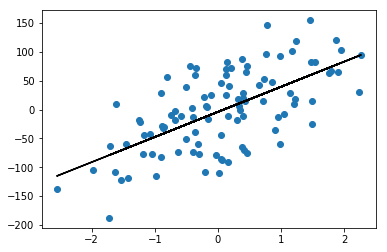

In [4]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

def gradient_descent_2(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost      
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=50) 
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x] # insert column
    alpha = 0.01 # learning rate
    theta = gradient_descent_2(alpha, x, y, 1000)

    # plot
    for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
    pylab.plot(x[:,1],y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()

losses= [1052.77172852  503.94293213  150.87057495   60.34299088   34.03137589
   21.55828476   35.97341156   29.19942474   26.61794662   18.73075104
   41.41929626   37.53506851   34.543293     25.16187668   50.97927094
   29.22568512   23.95188522   18.11366081   28.05348015   27.26625252
   30.90725708   21.70154762   17.87159729   22.03252792   24.41932297
   24.10294914   27.51963806   22.18463898   17.70773697   12.77386951
   17.16727638   16.23476791   20.98511887   21.03497314   13.54724121
   12.14040375   21.81261635   17.85117722   18.30251503   12.56560326
   15.81947231   15.2728281    19.7952652    14.93208408   16.01894188
   13.23143196   12.98117256   16.32617378   14.39717293   13.78875732
    7.98642254   12.68377972   24.87612152   25.8094635    20.79733276
   20.05612183   14.74667645   15.84316826   13.07076359   16.4418602
   14.84075737   12.53153896   18.22850037   12.15214634   11.40980148
   10.36370468   20.76682091   16.66492653   16.34989738   19.58478165

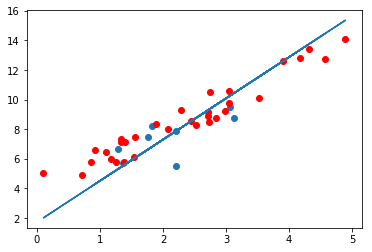

In [22]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np
# 设置随机数种子，为了在不同人电脑上运行时下面的输出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y = x*2 + 3，加上了一些噪声'''
    x = t.rand(batch_size,1) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1)
    return x, y
# 随机初始化参数
w = t.rand(1,1, requires_grad=True)
b = t.zeros(1,1, requires_grad=True)
losses = np.zeros(500)

lr =0.005 # 学习率
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())
for ii in range(500):
    x, y = get_fake_data(batch_size=32)
    
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    losses[ii] = loss.item()
    
    # backward：手动计算梯度
    loss.backward()
    
    # 更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    # 梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
    
print('losses=',losses)
    # 画图
plt.scatter(np.squeeze(data_x[:,0]), np.squeeze(data_y),c='red')
y_predict=data_x.mm(theta)
print('y_predict.shape',y_predict.shape)
print(data_x.detach().numpy())
plt.plot(data_x.detach().numpy()[:,0], y_predict.detach().numpy())  # predicted
plt.show()
